In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#to access our implemented ML functions
%load_ext autoreload
%autoreload 2


In [2]:
from implementations import *

In [3]:
Energy_range = [0.1, 0.2, 0.3, 0.5, 1.0, 2.0, 3.0, 5.0, 10.0, 20.0]
data_path = data_file(20.0)

In [4]:
df = build_df(data_path)

In [5]:
Energy_range_tot =  [0.2, 0.3, 0.5, 1.0, 2.0, 3.0, 5.0, 10.0, 20.0]
Energy_range =  []
datapath = data_file(20.0)
#datapath = data_file(0.1)
data_E = build_df(datapath)
data_E = clean_df(data_E)
data = data_E
for E in Energy_range:
    datapath = data_file(E)
    data_E = build_df(datapath)
    data_E = clean_df(data_E)
    print(E)
    data = pd.concat([data,data_E])

### Is it always Spawn_in_step == 1 ?

In [48]:
for E in Energy_range:
    df_check = clean_df(build_df(data_file(E)))
    Spawn_in_step = df_check[df_check.index == ':-----']['DZ']
    Spawn_in_step = Spawn_in_step.str.replace('(','',regex=True).str.replace('Rest=','',regex=True).astype('int')
    print('For Energy ', E, ' we have : ',Spawn_in_step[Spawn_in_step != 1].sum(), ' interactions that produce more than 1 one particule')

## Étude de données

<AxesSubplot:xlabel='KinE(MeV)', ylabel='Count'>

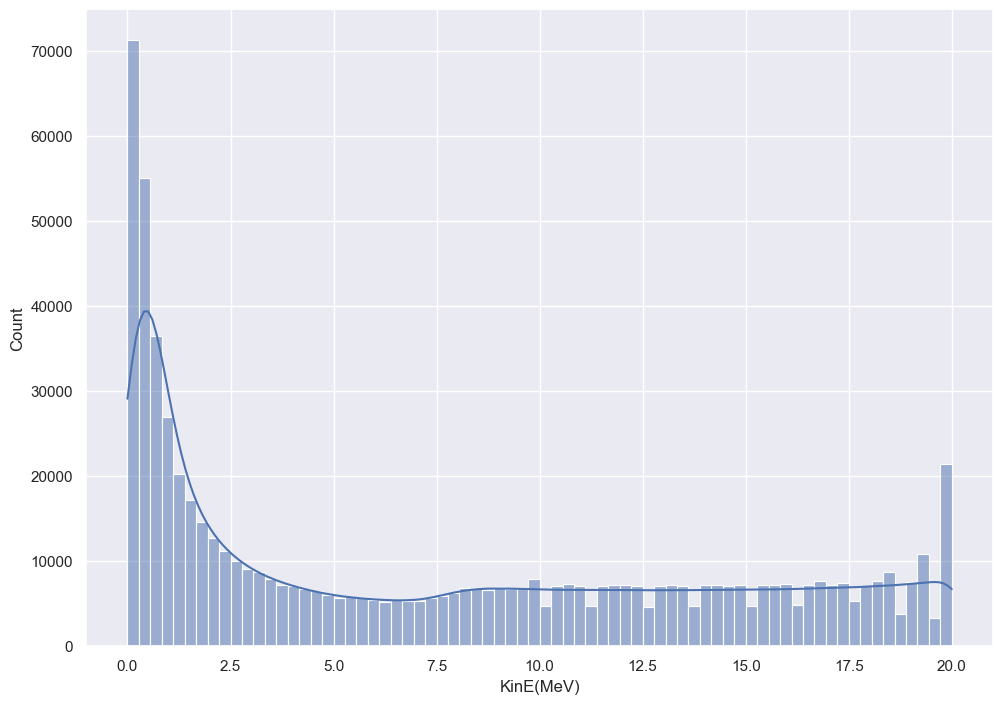

In [15]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
dataplot = df
dataplot = dataplot[dataplot['KinE(MeV)'] != 0]
sns.histplot(data=dataplot, x="KinE(MeV)", kde=True)

<AxesSubplot:xlabel='StepLeng', ylabel='Count'>

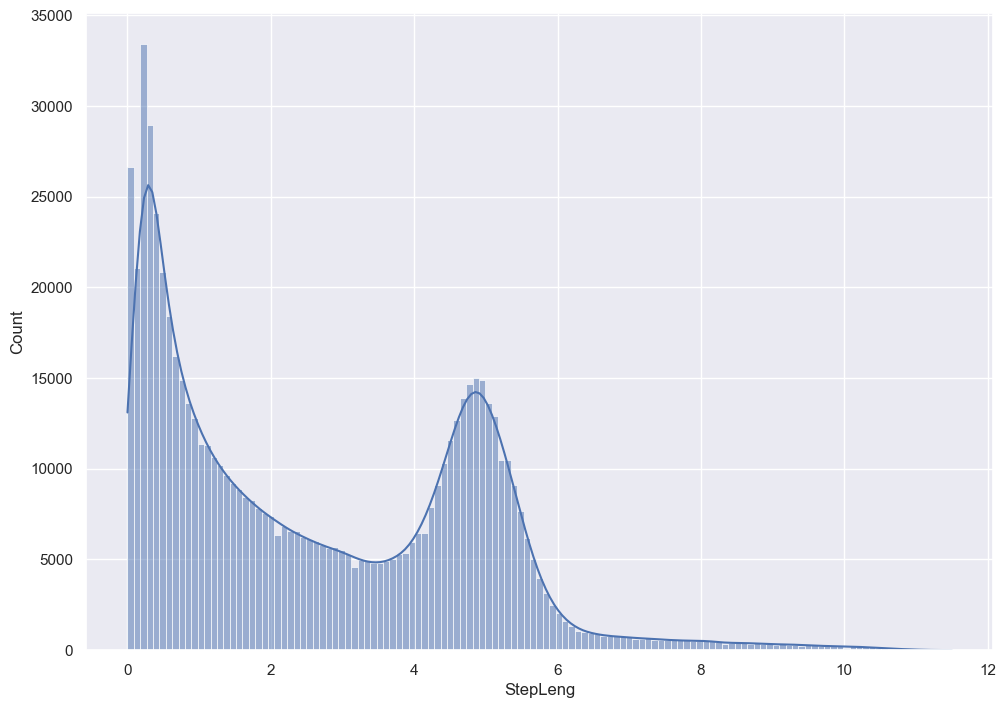

In [16]:
sns.histplot(data=dataplot, x="StepLeng", kde=True)

In [51]:
Energy_range = [0.1, 0.2, 0.3, 0.5, 1.0, 2.0, 3.0, 5.0, 10.0, 20.0]
data_path = data_file(20.0)
df = clean_df(build_df(data_path))

In [ ]:
data = []

for E in Energy_range:
    datapath = data_file(E)
    data_E = clean_df(build_df(datapath))
    data.append(data_E)
    print(E)
    
data = pd.concat(data)

## Plots

In [60]:
#remove index column + step 0
df_plot=df[df['index'] !=0]
dataplot = df_plot[df_plot['KinE(MeV)'] != 0]

<AxesSubplot:xlabel='DX', ylabel='Count'>

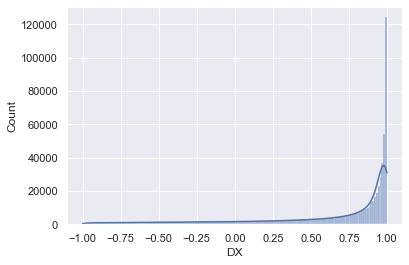

In [61]:
sns.histplot(data=dataplot, x="DX", kde=True)

<AxesSubplot:xlabel='DY', ylabel='Count'>

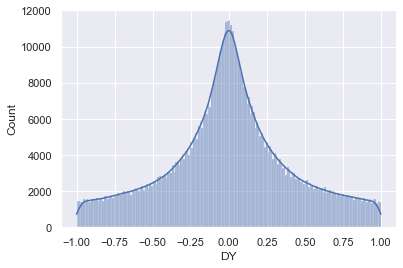

In [62]:
sns.histplot(data=dataplot, x="DY", kde=True)

<AxesSubplot:xlabel='DZ', ylabel='Count'>

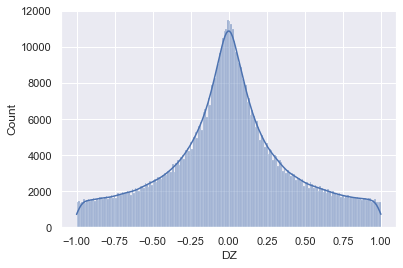

In [63]:
sns.histplot(data=dataplot, x="DZ", kde=True)

<AxesSubplot:xlabel='X(mm)', ylabel='Count'>

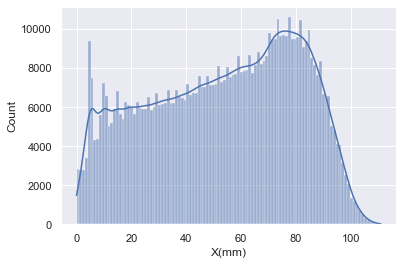

In [64]:
sns.histplot(data=dataplot, x="X(mm)", kde=True)

#### DX,DY,DZ distribution
DY et DZ follow a similar normal distribution -> Isotropic

<AxesSubplot:xlabel='Y(mm)', ylabel='Count'>

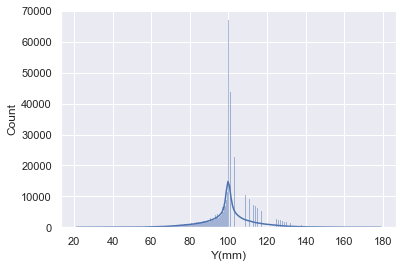

In [65]:
sns.histplot(data=dataplot, x="Y(mm)", kde=True)

<AxesSubplot:xlabel='Z(mm)', ylabel='Count'>

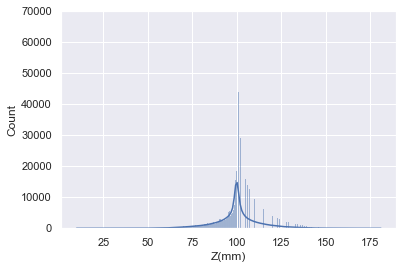

In [66]:
sns.histplot(data=dataplot, x="Z(mm)", kde=True)

<AxesSubplot:>

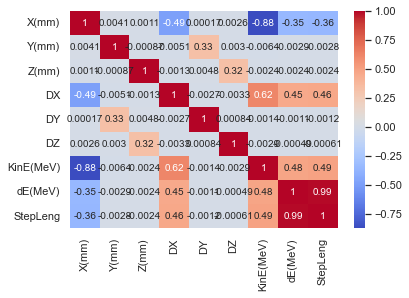

In [68]:
df_heatmap=df_plot.iloc[:,1:10]
sns.heatmap(df_heatmap.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')


#### dE and StepLeng correlation
Correlation of 0.99 between the features -> Correlated features, in general, don’t improve models but they affect specific models in different ways and to varying extents. It is clear that correlated features means that they bring the same information, so it is logical to remove one of them
-> We should remove one of the columns

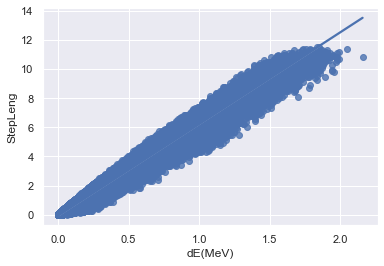

In [69]:
sns.regplot(x="dE(MeV)", y="StepLeng", data=df_heatmap);

<AxesSubplot:xlabel='X(mm)', ylabel='KinE(MeV)'>

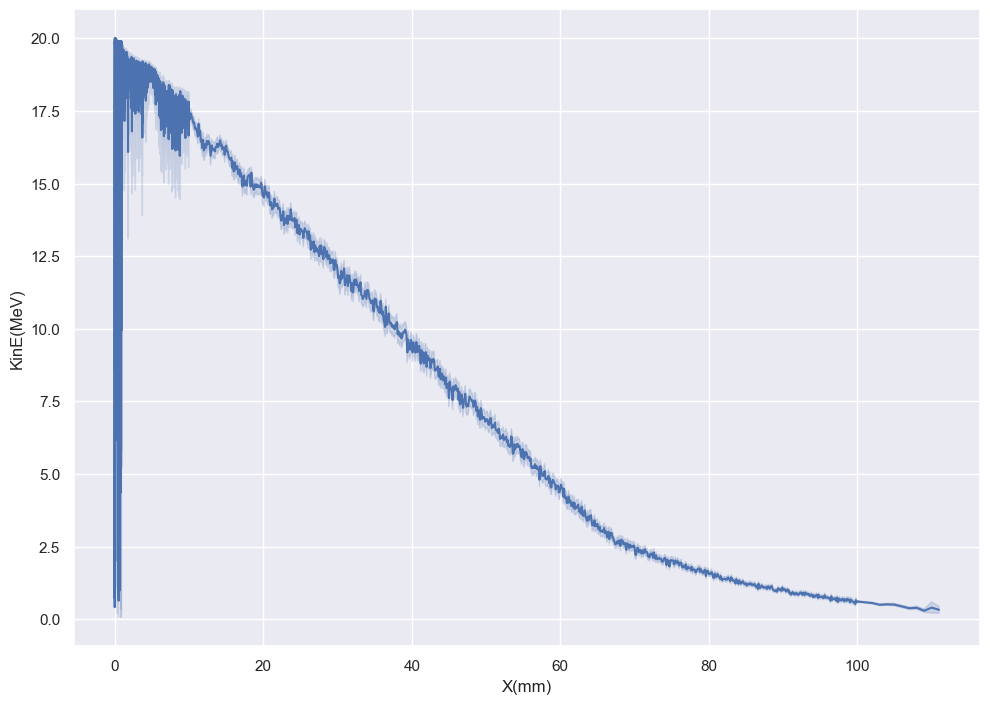

In [28]:
sns.lineplot(data=dataplot, x="X(mm)", y="KinE(MeV)")


<AxesSubplot:xlabel='Y(mm)', ylabel='KinE(MeV)'>

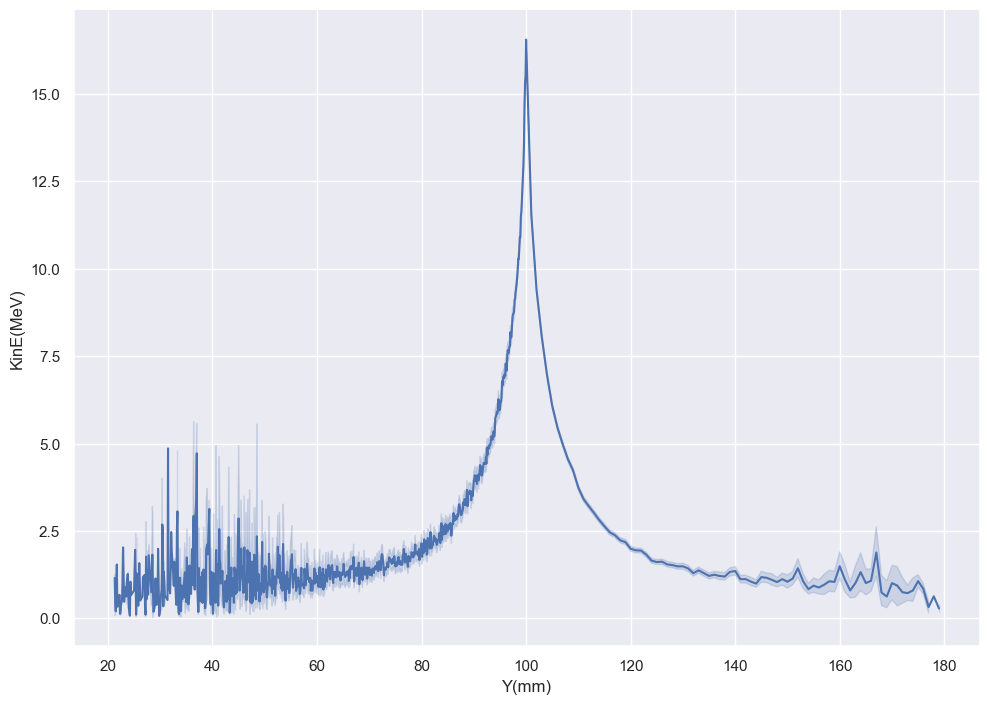

In [30]:
sns.lineplot(data=dataplot, x="Y(mm)", y="KinE(MeV)")


<AxesSubplot:xlabel='StepLeng', ylabel='KinE(MeV)'>

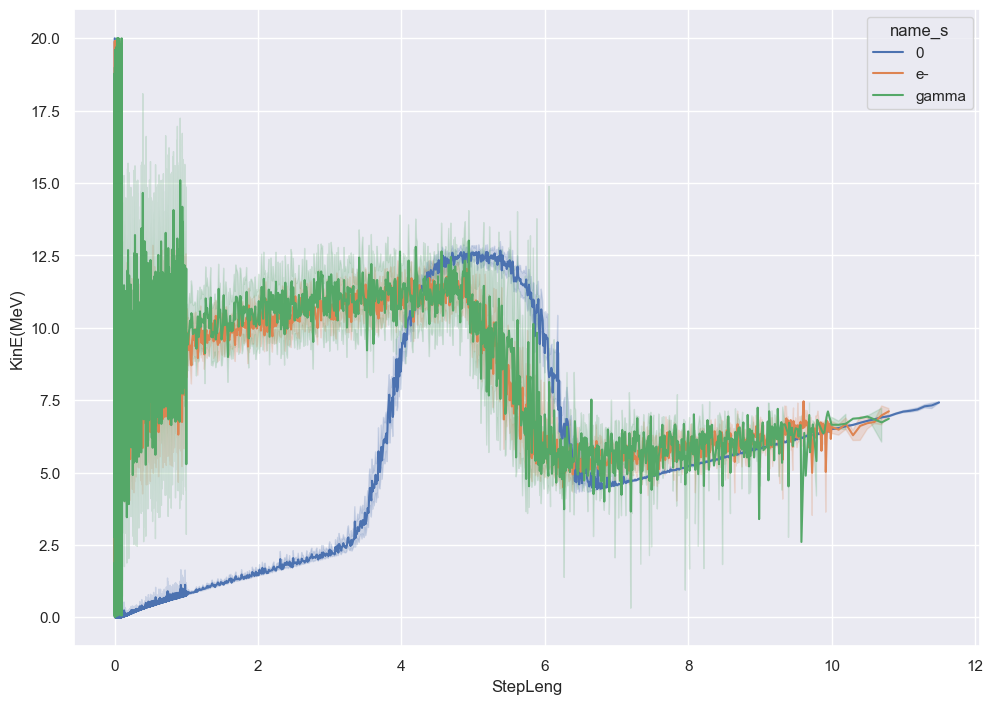

In [29]:
#Attention, prend du temps
sns.lineplot(data=df, x="StepLeng", y="KinE(MeV)",hue="name_s")
